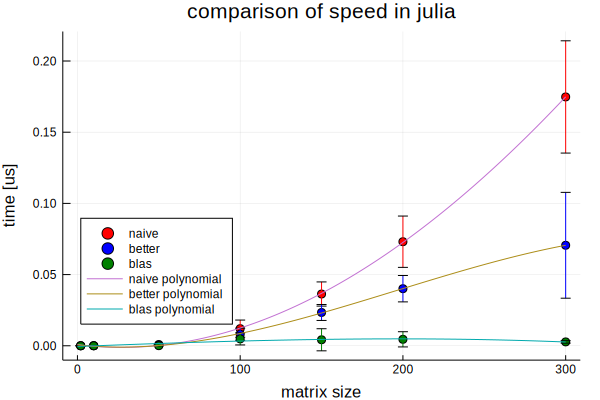

In [1]:
using CSV
using Plots
using Polynomials
using Statistics

function naive_multiplication(A,B)
C=zeros(Float64,size(A,1),size(B,2))
  for i=1:size(A,1)
    for j=1:size(B,2)
        for k=1:size(A,2)
            C[i,j]=C[i,j]+A[i,k]*B[k,j]
        end
    end
end
C
end

function better_multiplication( A,B )
C=zeros(Float64,size(A,1),size(B,2))
  for j=1:size(B,2)
    for k=1:size(A,2)
        for i=1:size(A,1)
            C[i,j]=C[i,j]+A[i,k]*B[k,j]
        end
    end
end
C
end



function time_naive(size)
    A=rand(size,size)
    B=A
    @elapsed naive_multiplication(A,B)
end

function time_better(size)
    A=rand(size,size)
    B=A
    @elapsed better_multiplication(A,B)
end

function time_blas(size)
    A=rand(size,size)
    B=A
    @elapsed A*B
end

# size = [2,10,100,500,1000,10000,50000,100000,1000000]
sizes = [2,10,50,100,150,200,300]
naive =[]
better=[]
blas = []


for s in sizes
    naive10=[]
    better10=[]
    blas10=[]
    for i in 1:10
        push!(naive10,time_naive(s))
        push!(better10,time_better(s))
        push!(blas10,time_blas(s))
    end
    push!(naive,naive10)
    push!(better,better10)
    push!(blas,blas10)
end

# find mean of measurement for each matrix size
mnaive = map(x->mean(x),naive)
mbetter = map(x->mean(x),better)
mblas= map(x->mean(x),blas)

# find error for each mean
errnaive = map(x->sqrt(var(x)),naive)
errbetter = map(x->sqrt(var(x)),better)
errblas = map(x->sqrt(var(x)),blas)

scatter(sizes,[mnaive,mbetter,mblas],yerr=[errnaive errbetter errblas],colour=[:red :blue :green],label=["naive" "better" "blas"],legend=:bottomleft)
# plot!(sizes,[mnaive,mbetter,mblas],colour=[:red :blue :green],label=["naive" "better" "blas"])
plot!(xlabel="matrix size",ylabel="time [us]",title="comparison of speed in julia")


dx=0:1:sizes[end]

fit1 = polyfit(sizes,mnaive,3)
plot!(dx,fit1(dx),label="naive polynomial")

fit2 = polyfit(sizes,mbetter,3)
plot!(dx,fit2(dx),label="better polynomial")

fit3 = polyfit(sizes,mblas,3)
plot!(dx,fit3(dx),label="blas polynomial")



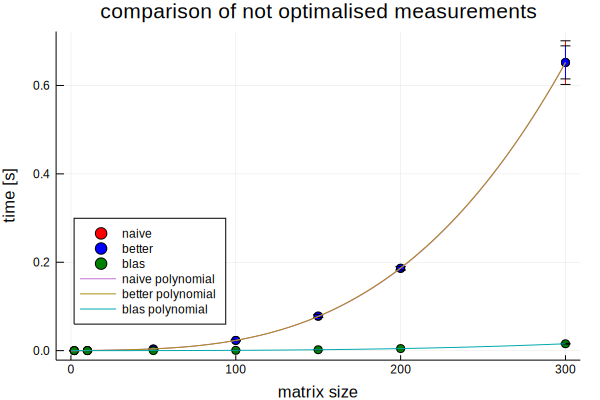

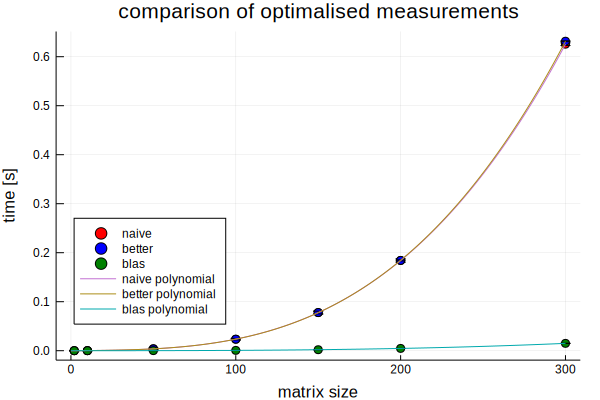

In [2]:
using CSV
using Plots
using Statistics

function new_scatter(input,scatter_title)
    data =CSV.read(input,delim=";")

    sizes=[]
    naive=[]
    better=[]
    blas=[]

    i=1;j=10
    while j <= size(data,1)
        push!(sizes,data[i,:sizes])
        naive10 = data[i:j,:naive]
        better10 = data[i:j,:better]
        blas10 = data[i:j,:blas]
        push!(naive,naive10)
        push!(better,better10)
        push!(blas,blas10)
        i+=10
        j+=10
    end

    # find mean of measurement for each matrix size
    mnaive = map(x->mean(x),naive)
    mbetter = map(x->mean(x),better)
    mblas= map(x->mean(x),blas)

    # find error for each mean
    errnaive = map(x->sqrt(var(x)),naive)
    errbetter = map(x->sqrt(var(x)),better)
    errblas = map(x->sqrt(var(x)),blas)

    s1 =scatter(sizes,[mnaive,mbetter,mblas],yerr=[errnaive errbetter errblas],colour=[:red :blue :green],label=["naive", "better" ,"blas"],legend=:bottomleft)
#     plot!(sizes,[mnaive,mbetter,mblas],colour=[:red :blue :green],label=["naive" "better" "blas"],legend=:bottomleft)
    plot!(xlabel="matrix size",ylabel="time [s]",title=scatter_title)
    
    dx=0:1:sizes[end]

    fit1 = polyfit(sizes,mnaive,3)
    plot!(dx,fit1(dx),label="naive polynomial")

    fit2 = polyfit(sizes,mbetter,3)
    plot!(dx,fit2(dx),label="better polynomial")

    fit3 = polyfit(sizes,mblas,3)
    plot!(dx,fit3(dx),label="blas polynomial")
    
    return s1
end



display(new_scatter("notoptimalised.csv","comparison of not optimalised measurements"))
display(new_scatter("optimalised.csv","comparison of optimalised measurements"))
